In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import op

In [2]:
start_year = 1960
end_year = 2023

path_to_data = ""


In [3]:
years = op.compute_years(start_year,end_year)

In [4]:
title_basics = pd.read_csv( path_to_data + 'title.basics.tsv', sep = '\t', low_memory=False, usecols=[0,1,2,5,8])

In [5]:
title_ratings = pd.read_csv( path_to_data + 'title.ratings.tsv', sep = '\t', low_memory=False)

In [6]:
country_codes = pd.read_csv( path_to_data + 'country_codes.csv',  low_memory=False)
gdp_per_capita = pd.read_csv( path_to_data + 'gdp_per_capita.csv',  header = 2, low_memory=False)
gdp = pd.read_csv( path_to_data + 'gdp.csv', header = 2, low_memory=False)
population = pd.read_csv( path_to_data + 'population.csv',  header = 2, low_memory=False)

In [7]:
title_akas = pd.read_csv( path_to_data + 'title.akas.tsv', sep = '\t', low_memory=False, usecols=[0,2,3,7])

# Cinematic Impact

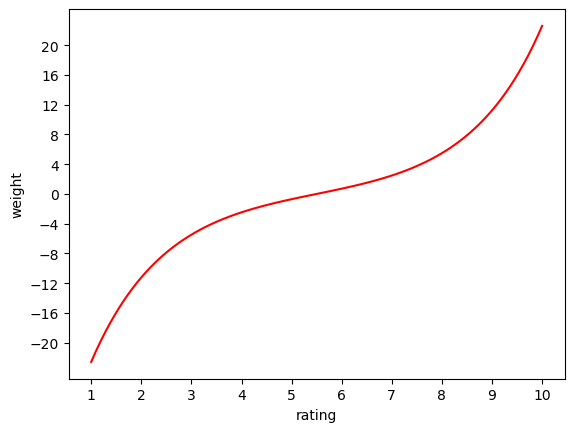

In [8]:
def weight(x): return 2.0**(x-5.5)-2.0**(-(x-5.5))

x = np.linspace(1, 10, 100)

plt.plot(x, weight(x), color='red')
plt.xticks(np.linspace(1,10,10))
plt.yticks(np.linspace(-20,20,11))
plt.xlabel("rating")
plt.ylabel("weight")

plt.show()


In [9]:
df = op.prepare_data(title_basics,years,title_ratings,weight)

C:\Users\Rafał\FilmRanking\op.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce').astype('Int64')


In [10]:
df

,tconst,primaryTitle,startYear,genres,averageRating,numVotes,impact,order
0,tt0111161,The Shawshank Redemption,1994,[Drama],9.3,2899874,4.018360e+07,1
1,tt0468569,The Dark Knight,2008,"[Action, Crime, Drama]",9.0,2881005,3.234020e+07,2
2,tt0068646,The Godfather,1972,"[Crime, Drama]",9.2,2020474,2.610269e+07,3
3,tt1375666,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,2560184,2.495571e+07,4
4,tt0110912,Pulp Fiction,1994,"[Crime, Drama]",8.9,2228487,2.331294e+07,5
...,...,...,...,...,...,...,...,...
270551,tt1702443,Justin Bieber: Never Say Never,2011,"[Documentary, Music]",1.7,76447,-1.059327e+06,270552
270552,tt1213644,Disaster Movie,2008,"[Comedy, Sci-Fi]",1.9,94667,-1.140100e+06,270553
270553,tt5988370,Reis,2017,"[Biography, Drama]",1.0,74076,-1.672875e+06,270554
270554,tt7886848,Sadak 2,2020,"[Action, Drama]",1.2,96719,-1.900291e+06,270555


# Countries

In [11]:
title_akas

,titleId,title,region,isOriginalTitle
0,tt0000001,Carmencita,\N,1
1,tt0000001,Carmencita,DE,0
2,tt0000001,Carmencita,US,0
3,tt0000001,Carmencita - spanyol tánc,HU,0
4,tt0000001,Καρμενσίτα,GR,0
...,...,...,...,...
48458670,tt9916852,エピソード #3.20,JP,0
48458671,tt9916852,Episodio #3.20,ES,0
48458672,tt9916856,The Wind,\N,1
48458673,tt9916856,The Wind,DE,0


In [12]:
df_countries = op.prepare_countries(df,title_akas,country_codes)
ids = df["tconst"]

In [13]:
df_countries

,tconst,primaryTitle,startYear,genres,averageRating,numVotes,impact,order,title,region,duplicated,Country Name
0,tt0111161,The Shawshank Redemption,1994,[Drama],9.3,2899874,4.018360e+07,1,The Shawshank Redemption,IS,True,Iceland
1,tt2380307,Coco,2017,"[Adventure, Animation, Drama]",8.4,594120,4.355073e+06,125,Coco,IS,True,Iceland
2,tt0120587,Antz,1998,"[Adventure, Animation, Comedy]",6.5,164355,2.465325e+05,2047,Antz,IS,True,Iceland
3,tt6820256,Arctic,2018,"[Adventure, Drama]",6.8,58487,1.202588e+05,3340,Arctic,IS,True,Iceland
4,tt10696784,The Harder They Fall,2021,"[Action, Drama, Western]",6.6,71472,1.198607e+05,3346,The Harder They Fall,IS,True,Iceland
...,...,...,...,...,...,...,...,...,...,...,...,...
641238,tt13507976,The Story of Mariama,2013,[Drama],3.4,8,-3.243068e+01,215705,Mariama La Tariko,GM,True,"Gambia, The"
641239,tt1182896,Harvest,2008,"[Drama, Musical]",4.9,39,-3.338254e+01,216117,Harvest,LC,False,St. Lucia
641240,tt3561878,Seki A Oe: A Crazy Samoan Love Story,2013,[Comedy],4.2,19,-3.906709e+01,218228,Seki A Oe: A Crazy Samoan Love Story,AS,True,American Samoa
641241,tt9587244,Take Home Pay,2019,"[Action, Comedy]",5.2,180,-7.540056e+01,226938,Take Home Pay,WS,True,Samoa


 A film is assigned to a given country if it was released there under its original title. Below is the fraction of films that are uniquely assigned.

In [14]:
print(op.unique_count(df_countries,ids))

0.4800669731959373


# TASK 1: Quality of movies

In [15]:
op.top(df_countries, 120)

,country,number of movies in top 120
16,India,228
11,Canada,130
7,United States,128
3,Philippines,108
9,South Africa,108
5,Singapore,107
14,United Kingdom,106
10,Australia,106
15,Indonesia,104
13,"Egypt, Arab Rep.",94


# TASK 2: "Cinematic impact" hegemony (country order)

In [16]:
strong_impact_by_countries = df_countries.groupby(["Country Name"])["impact"].sum().sort_values(ascending=False)

In [17]:
strong_impact_by_countries

Country Name
India                  5.627756e+09
Canada                 3.669137e+09
United States          3.313913e+09
United Kingdom         2.904989e+09
Australia              2.880978e+09
                           ...     
Gibraltar             -1.682899e+03
St. Kitts and Nevis   -2.367592e+03
Bermuda               -4.267949e+03
Saudi Arabia          -3.632517e+04
Aruba                 -5.398664e+04
Name: impact, Length: 201, dtype: float64

In [18]:
weak_impact_by_countries = df_countries.groupby(["Country Name"])["numVotes"].sum().sort_values(ascending=False)

In [19]:
weak_impact_by_countries

Country Name
India             1618767209
Canada            1185381588
United States     1020961931
United Kingdom     949634514
Australia          924961020
                     ...    
Botswana                  10
San Marino                 8
Seychelles                 8
Gambia, The                8
Comoros                    8
Name: numVotes, Length: 201, dtype: int64

In [20]:
country_data = op.prepare_country_data(years, gdp, gdp_per_capita, population,strong_impact_by_countries, weak_impact_by_countries)



In [21]:
country_data

,Country Name,mean_gdp,mean_gdp_per_capita,mean_population,impact,numVotes,votes/gdp,impact/gdp,votes/gdp_per_capita,impact/gdp_per_capita,...,impact/population,rank mean_gdp,rank mean_gdp_per_capita,rank mean_population,rank votes/gdp,rank impact/gdp,rank votes/gdp_per_capita,rank impact/gdp_per_capita,rank votes/population,rank impact/population
160,Singapore,1.134488e+11,23373.110395,3.499356e+06,2.677621e+09,766880021,6.759702e-03,2.360202e-02,32810.353780,32810.353780,...,765.175413,44,27,120,3,3,12,12,1,1
5,United Arab Emirates,1.597316e+11,32790.619608,3.434974e+06,1.935359e+09,477070959,2.986704e-03,1.211632e-02,14549.007146,14549.007146,...,563.427678,31,12,121,9,7,32,32,2,2
90,Israel,1.276477e+11,17586.418224,5.396000e+06,1.363137e+09,398126068,3.118945e-03,1.067890e-02,22638.269085,22638.269085,...,252.619927,35,41,98,8,9,18,18,3,3
86,Ireland,1.236252e+11,27612.707590,3.759066e+06,8.418865e+08,247284146,2.000274e-03,6.809994e-03,8955.447241,8955.447241,...,223.961622,38,18,118,14,14,39,39,5,4
140,New Zealand,7.614029e+10,17868.108767,3.627486e+06,7.959356e+08,221482503,2.908874e-03,1.045354e-02,12395.408260,12395.408260,...,219.417977,55,40,119,10,10,36,36,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Isle of Man,4.553556e+09,55340.288221,6.926483e+04,-1.222982e+03,12869,2.826143e-06,-2.685774e-07,0.232543,0.232543,...,-0.017657,148,3,188,117,194,152,152,83,196
99,St. Kitts and Nevis,3.709479e+08,7994.983683,4.595755e+04,-2.367592e+03,2046,5.515599e-06,-6.382546e-06,0.255910,0.255910,...,-0.051517,192,64,193,110,197,150,150,98,197
67,Gibraltar,NaN,NaN,2.840641e+04,-1.682899e+03,765,NaN,NaN,NaN,NaN,...,-0.059244,199,199,199,200,200,200,200,106,198
24,Bermuda,2.832728e+09,45041.475809,5.836653e+04,-4.267949e+03,1865,6.583759e-07,-1.506657e-06,0.041406,0.041406,...,-0.073123,157,6,190,127,196,170,170,102,199


In [22]:
hegemony = op.prepare_hegemony(country_data)

In [23]:
hegemony

,country,weak hegemony by GDP,weak hegemony by GDP/population,weak hegemony by population,strong hegemony by GDP,strong hegemony by GDP/population,strong hegemony by population
160,Singapore,41,15,119,41,15,119
5,United Arab Emirates,22,-20,119,24,-20,119
90,Israel,27,23,95,26,23,95
86,Ireland,24,-21,113,24,-21,114
140,New Zealand,45,4,113,45,4,114
...,...,...,...,...,...,...,...
84,Isle of Man,31,-149,105,-46,-149,-8
99,St. Kitts and Nevis,82,-86,95,-5,-86,-4
67,Gibraltar,-1,-1,93,-1,-1,1
24,Bermuda,30,-164,88,-39,-164,-9


# TASK 3: Own Analysis (Polish vs. Czech & Slovakian Comedies)

In this section we consider only those movies that were UNIQUELY assigned to Poland, Czechia, Slovakia or Czechosloviakia.

In [24]:
pl_com = op.prepare_pl(df,df_countries)

In [25]:
pl_com

,tconst,title,primaryTitle,startYear,genres,averageRating,numVotes,impact,order
7,tt3775202,Ai amu a hîrô,I Am a Hero,2015,Comedy,6.7,7825,14571.100177,10555
8,tt0066289,Rejs,The Cruise,1970,Comedy,7.5,3714,13927.500000,10782
9,tt0090246,"Vabank II, czyli riposta","Vabank II, czyli riposta",1985,Comedy,7.4,2967,10278.247578,12436
10,tt0071907,Nie ma mocnych,Nie ma mocnych,1974,Comedy,7.5,2196,8235.000000,13870
12,tt7133554,Cicha noc,Silent Night,2017,Comedy,7.1,2957,7988.501551,14097
...,...,...,...,...,...,...,...,...,...
1098,tt5867468,Kochaj!,Kochaj!,2016,Comedy,2.4,196,-1657.681481,260768
1099,tt0338086,Haker,Haker,2002,Comedy,4.0,688,-1702.713129,260957
1102,tt1808360,"Och, Karol 2","Och, Karol 2",2011,Comedy,4.3,1068,-1988.745685,262079
1106,tt0878113,Dlaczego nie!,Dlaczego nie!,2007,Comedy,3.6,840,-2909.918424,264425


In [26]:
cz_com = op.prepare_cz(df,df_countries)

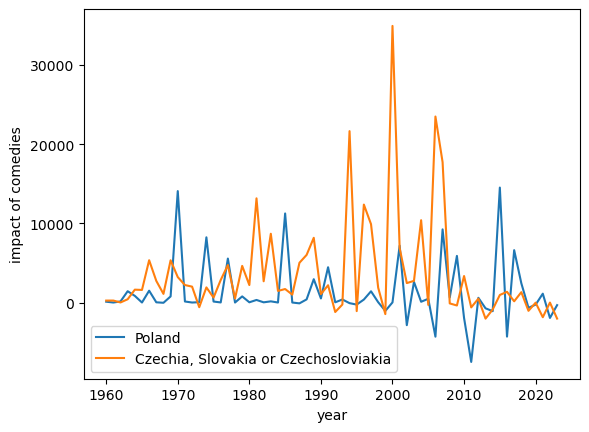

In [33]:

    totalImpact=[]
    for y in years:
        total=np.sum(pl_com[pl_com["startYear"]==y]["impact"])
        if np.isnan(total):
            total=0.0
        totalImpact.append(total) 
    plt.plot(years, totalImpact, label = "Poland")
plt.legend(loc='best')

cumimpact1 = np.cumsum(totalImpact)

    totalImpact=[]
    for y in years:
        total=np.sum(cz_com[cz_com["startYear"]==y]["impact"])
        if np.isnan(total):
            total=0.0
        totalImpact.append(total) 
    plt.plot(years, totalImpact, label = "Czechia, Slovakia or Czechosloviakia")
plt.legend(loc='best')

cumimpact2 = np.cumsum(totalImpact)
plt.xlabel("year")
plt.ylabel("impact of comedies")
plt.show()

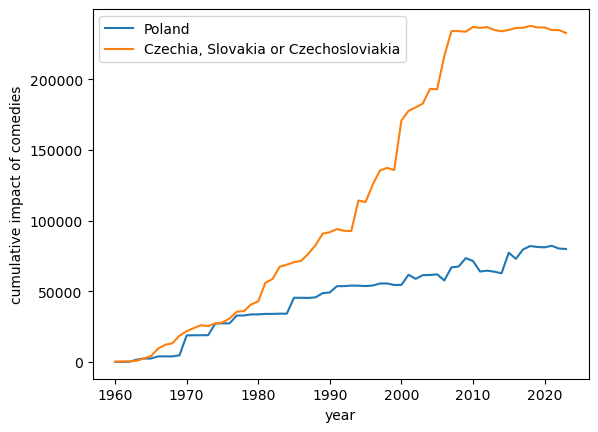

In [34]:
plt.plot(years, cumimpact1, label = "Poland")
plt.plot(years, cumimpact2, label = "Czechia, Slovakia or Czechosloviakia")
plt.legend(loc='best')
plt.xlabel("year")
plt.ylabel("cumulative impact of comedies")
plt.show()

,tconst,primaryTitle,startYear,genres,averageRating,numVotes,impact,order,title,region,duplicated,Country Name
631235,tt0054215,Psycho,1960,"[Horror, Mystery, Thriller]",8.5,720560,5.674410e+06,88,Psycho,CSHH,True,Czechoslovakia
631236,tt0083658,Blade Runner,1982,"[Action, Drama, Sci-Fi]",8.1,825203,4.866988e+06,107,Blade Runner,CSHH,True,Czechoslovakia
631237,tt0083658,Blade Runner,1982,"[Action, Drama, Sci-Fi]",8.1,825203,4.866988e+06,107,Blade Runner,CSHH,True,Czechoslovakia
631238,tt0075686,Annie Hall,1977,"[Comedy, Romance]",8.0,278984,1.528854e+06,409,Annie Hall,CSHH,True,Czechoslovakia
631239,tt0100802,Total Recall,1990,"[Action, Adventure, Sci-Fi]",7.5,355603,1.333511e+06,468,Total Recall,CSHH,True,Czechoslovakia
...,...,...,...,...,...,...,...,...,...,...,...,...
632299,tt0174757,Hroch,1973,"[Comedy, Fantasy]",1.7,39,-5.404236e+02,250684,Hroch,CSHH,False,Czechoslovakia
632300,tt0310246,Trhala fialky dynamitem,1992,[Comedy],2.6,173,-1.268141e+03,258701,Trhala fialky dynamitem,CSHH,False,Czechoslovakia
632301,tt0089308,Howling II: ... Your Sister Is a Werewolf,1985,"[Horror, Thriller]",3.7,8150,-2.603948e+04,269851,Howling II: Stirba - Werewolf Bitch,CSHH,True,Czechoslovakia
632302,tt5108870,Morbius,2022,"[Action, Adventure, Horror]",5.1,154238,-8.662772e+04,270373,Morbius,CSHH,True,Czechoslovakia
